# 作業:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

# 資料預處理

In [2]:
from tensorflow.keras.utils import to_categorical
import numpy as np
np.random.seed(10)

In [3]:
#載入手寫辨識的資料集
from tensorflow.keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


In [4]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [6]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = to_categorical(y_train_label)
y_Test_OneHot = to_categorical(y_test_label)

# 建立模型

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
#建立模型
model = Sequential()

In [10]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

In [13]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 398,336
Trainable params: 398,336
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [15]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [16]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
48000/48000 [==============================] - 10s 200us/sample - loss: 0.2496 - acc: 0.9250 - val_loss: 0.1141 - val_acc: 0.9668
Epoch 2/10
48000/48000 [==============================] - 9s 190us/sample - loss: 0.1077 - acc: 0.9676 - val_loss: 0.1194 - val_acc: 0.9666
Epoch 3/10
48000/48000 [==============================] - 9s 188us/sample - loss: 0.0789 - acc: 0.9765 - val_loss: 0.1045 - val_acc: 0.9709
Epoch 4/10
48000/48000 [==============================] - 9s 197us/sample - loss: 0.0628 - acc: 0.9818 - val_loss: 0.0892 - val_acc: 0.9763
Epoch 5/10
48000/48000 [==============================] - 9s 192us/sample - loss: 0.0507 - acc: 0.9847 - val_loss: 0.1062 - val_acc: 0.9737
Epoch 6/10
48000/48000 [==============================] - 9s 194us/sample - loss: 0.0431 - acc: 0.9871 - val_loss: 0.1148 - val_acc: 0.9715
Epoch 7/10
48000/48000 [==============================] - 9s 

# 以圖形顯示訓練過程

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

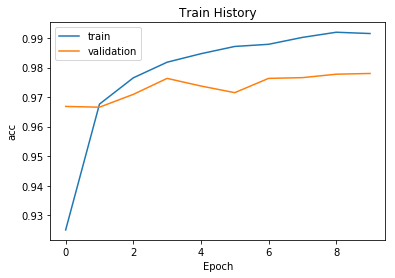

In [18]:
show_train_history(train_history,'acc','val_acc')

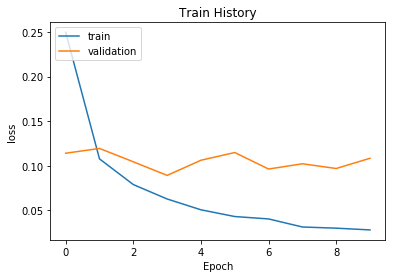

In [19]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [20]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 39us/sample - loss: 0.0934 - acc: 0.9791

accuracy= 0.9791
